
Case Study I found in DataCamp git hub repository


The objective is not just to give the answer but to practice the skills. So it may be unnecessary long to fulfill that second objective.


## **Project Brief**

Your company owns a chain of stores across Russia that sell a variety of types of alcohol. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. 

The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful and need help determining which regions they should select.

# Process overview and conclusion 

**Similar habits in the view of wine consumption will be thought of as:**

1. similar correlation to other drinks has Saint Petersburg 
2. regions with a similar mean and std of wine sales as Saint Petersburg. (similar means within 95% CI )
3. Ranked by wine sales relative to a year

**Conclusions:**
1. The last 10 years habits have change
2. Wine sales have a high correlation with champagne and brandy sales (with p-value \< 0.05)

Recommendations sorted by wines sales relative to year sales:
1. Murmansk Oblast
2. Moscow
3. Leningrad Oblast
4. Sverdlovsk Oblast
5. Tver Oblast
6. Magadan Oblast
7. Bryansk Oblast
8. Nizhny Novgorod Oblast
9. Sakhalin Oblast
10. Moscow Oblast


# Import the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("/content/drive/MyDrive/Datasets/Alcohol Consumption in Russia/alcohol-consumption-in-russia.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


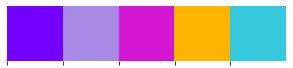

In [4]:
# Color Palette
custom_colors = ['#7400ff', '#a788e4', '#d216d2', '#ffb500', '#36c9dd']
sns.palplot(sns.color_palette(custom_colors))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Set tick size
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
# set size
sns.set(rc= {"figure.figsize": (8, 8)})

# Overview

In [5]:
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [6]:
df.nunique()

year          19
region        85
wine         210
beer         796
vodka        313
champagne    107
brandy        76
dtype: int64

In [7]:
means= df.melt(value_vars=["wine", "beer", "vodka", "champagne", "brandy"]).groupby("variable").mean()
means.sort_values(by="value", ascending=False)

,value
variable,
beer,51.260148
vodka,11.818694
wine,5.628144
champagne,1.313177
brandy,0.526998


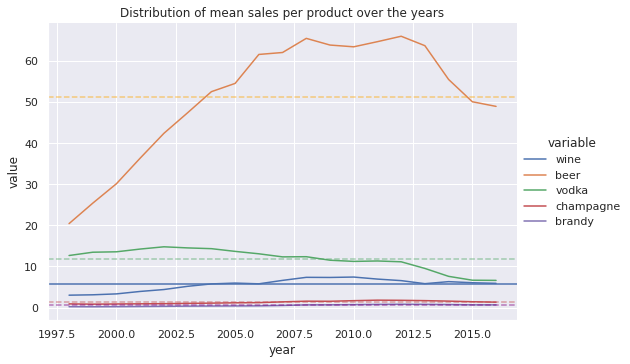

In [8]:
sns.set(rc= {"figure.figsize": (8, 12)})
data= df.groupby("year").mean().reset_index().melt(id_vars="year")
sns.relplot(data=data, x= "year", y="value", hue="variable", kind="line",aspect=1.5)
plt.axhline(means.loc["wine",].value )
plt.axhline(means.loc["beer",].value,color="orange", alpha=0.5, linestyle="--" )
plt.axhline(means.loc["vodka",].value,color="g", alpha=0.5, linestyle="--" )
plt.axhline(means.loc["champagne",].value,color="r", alpha=0.5, linestyle="--" )
plt.axhline(means.loc["brandy",].value,color="purple", alpha=0.5, linestyle="--" )
plt.title("Distribution of mean sales per product over the years")
plt.show()

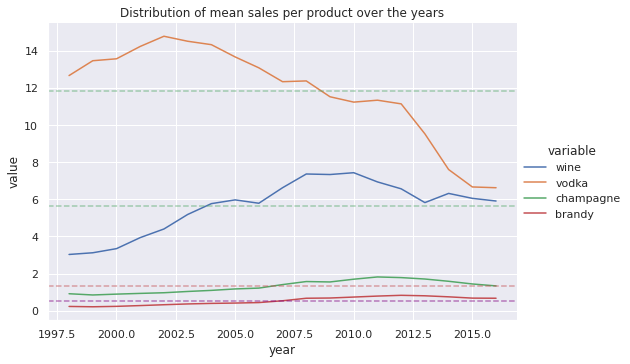

In [9]:
sns.set(rc= {"figure.figsize": (8, 12)})
data= df.groupby("year").mean().reset_index().melt(id_vars="year")

data = data[data.variable.isin(["wine", "champagne", "brandy","vodka"])]
sns.relplot(data=data, x= "year", y="value", hue="variable", kind="line",aspect=1.5)
plt.axhline(means.loc["wine",].value ,color="g", alpha=0.5, linestyle="--")
plt.axhline(means.loc["vodka",].value,color="g", alpha=0.5, linestyle="--" )
plt.axhline(means.loc["champagne",].value,color="r", alpha=0.5, linestyle="--" )
plt.axhline(means.loc["brandy",].value,color="purple", alpha=0.5, linestyle="--" )


plt.title("Distribution of mean sales per product over the years")
plt.show()

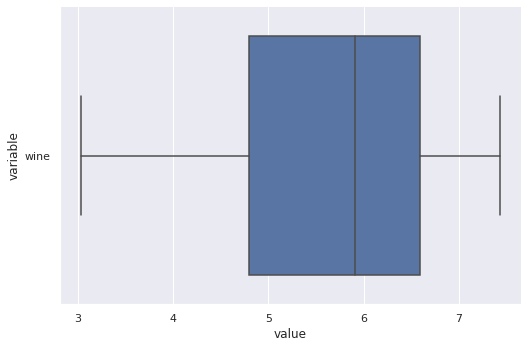

In [10]:
#@title Default title text
var = "wine" #@param ["beer","wine", "vodka", "champagne", "brandy"]
sns.catplot(data=data.query('variable ==@var ') ,x="value", y="variable" ,orient="h", kind="box", aspect=1.5)

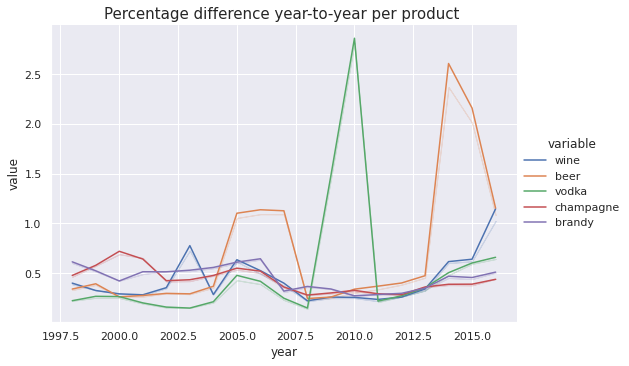

In [11]:
df_pct = df.set_index("year")[["wine", "beer", "vodka", "champagne", "brandy"]].pct_change().reset_index()
df_pct_data  = df_pct.melt(id_vars="year", value_vars=["wine", "beer", "vodka", "champagne", "brandy"])

sns.relplot(data=df_pct_data, x= "year", y ="value", hue="variable" , kind="line", aspect=1.5,ci=False)
plt.title("Percentage difference year-to-year per product ", fontdict={"size":15})
plt.show()


# Saint Petersburg

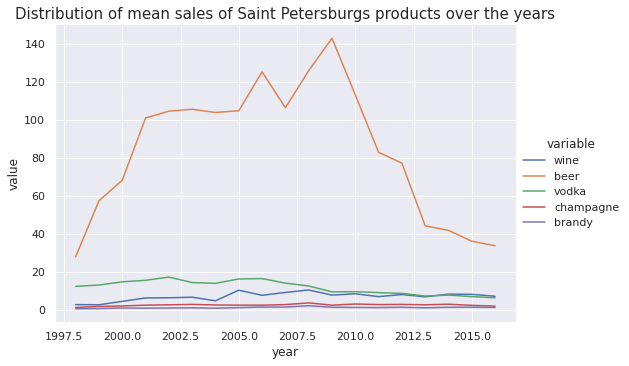

In [12]:
# define the subset
SaintPetersburg=df.query('region=="Saint Petersburg"')

# The best format for seaborn is long
SaintPetersburg_data  = SaintPetersburg.melt(id_vars="year", value_vars=["wine", "beer", "vodka", "champagne", "brandy"])

# plot the sales over time 
sns.relplot(data=SaintPetersburg_data, x= "year", y ="value", hue="variable" , kind="line",aspect=1.5)
plt.title("Distribution of mean sales of Saint Petersburgs products over the years", fontdict={"size":15})
plt.show()

What is the difference between Saint Petersburg and the whole dataset ? 

In [13]:
# the mean sale per product 
SaintPetersburg_means  = SaintPetersburg_data.groupby("variable").agg({"value":"mean"})
# add mean sale per product overall
means_vs_stP = pd.merge(means,SaintPetersburg_means,left_index=True, right_index=True, suffixes=("_overall","_StPetersburg") )
# calculate the difference 
means_vs_stP["Diff"] = means_vs_stP.value_overall - means_vs_stP.value_StPetersburg
means_vs_stP.rename(columns={"value_overall":"sample mean", "value_StPetersburg": "StPetersburg mean"})

,sample mean,StPetersburg mean,Diff
variable,,,
beer,51.260148,84.375263,-33.115115
brandy,0.526998,1.117368,-0.590370
champagne,1.313177,2.468947,-1.155771
vodka,11.818694,11.821579,-0.002885
wine,5.628144,6.952632,-1.324487


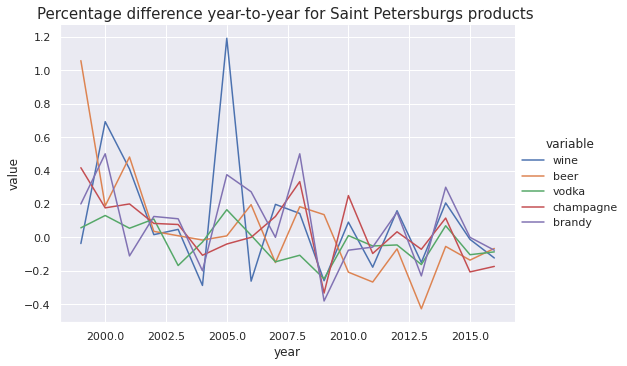

In [14]:
SaintPetersburg_pct = SaintPetersburg.set_index("year")[["wine", "beer", "vodka", "champagne", "brandy"]].pct_change().reset_index()
SaintPetersburg_pct_data  = SaintPetersburg_pct.melt(id_vars="year", value_vars=["wine", "beer", "vodka", "champagne", "brandy"])

sns.relplot(data=SaintPetersburg_pct_data, x= "year", y ="value", hue="variable" , kind="line", aspect=1.5)
plt.title("Percentage difference year-to-year for Saint Petersburgs products ", fontdict={"size":15})
plt.show()


# What defines similar habbits ?

If I can prove the distribution is similar, than those cities have similar habbits 

Lets test two cities and than create a model to evaluate all 

In [15]:
RepublicofAdygea=df.query('region=="Republic of Adygea"')

Difference : Saint Petersburg statistics - RepublicofAdygea statistics

In [16]:
SaintP_desc =SaintPetersburg.describe()
RepAdygea_desc = RepublicofAdygea.describe()
round(SaintP_desc - RepAdygea_desc,3)

,year,wine,beer,vodka,champagne,brandy
count,0.0,0.000,0.000,0.000,0.000,0.000
mean,0.0,2.990,55.932,5.532,1.451,0.609
std,0.0,0.951,27.962,1.592,0.081,0.032
min,0.0,0.700,19.100,2.900,0.900,0.400
25%,0.0,3.055,23.450,4.305,1.650,0.600
50%,0.0,3.300,70.600,5.900,1.500,0.630
75%,0.0,3.800,74.000,6.650,1.485,0.600
max,0.0,3.600,106.000,6.800,1.800,0.900


In [17]:

def diff_of_means(data_1, data_2):
  """Difference in means of two arrays."""

  # The difference of means of data_1, data_2: diff
  diff = np.mean(data_1)-np.mean(data_1)

  return diff


def draw_perm_reps(data1, data2, func, size=1):
  """Generate multiple permutation replicates."""

  # Initialize array of replicates: perm_replicates
  perm_replicates = np.empty(size)
  data = np.concatenate((data1,data2))


	# Permute the concatenated array: scramble (change the order)
  for i in range(size):
    permuted_data = np.random.permutation(data)
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
     
    # Compute the test statistic
    perm_replicates[i] = func(perm_sample_1,perm_sample_2)

  return perm_replicates


In [18]:
diff= SaintPetersburg.wine.mean()-RepublicofAdygea.wine.mean()
bs_reps=draw_perm_reps(SaintPetersburg.wine,RepublicofAdygea.wine, diff_of_means, size=10000 )
p= np.sum(bs_reps>=diff) / len(bs_reps)
print("Difference between the two cities is {} with a p-value of {}".format(round(diff,3), p))

Difference between the two cities is 2.99 with a p-value of 0.0


Anlyzing the difference between wine distribution of Republic of Adygea and Saint Petersburg I found that the later had a mean 2.91 higher and that in 10,000 simulations I could not find a equal or higher value. Thus this two distributions are statisticaly different and is safe to assume Saint Petersburg cunsumes more wine then Republic of Adygea. 



I want the regions that differ from Saint Petersburg by the smallest number in all categories but mainly in  wine consumption.

But before that, I need to find how related is wine with the other drinks.
What cities have similar correlations to Saint Petersburg.

Different cities have different consumptions levels, so maybe I should normalize the values by year total consumption.

We want to make sure that wine distribution follows similar mu and std.

Optmize by : 
* similar correlation to other drinks has Saint Petersburg ;
* the smallest difference in `relative` mean
* regions with simlar mean and std of wine sales as Saint Petersburg. 

# See the distribuitons

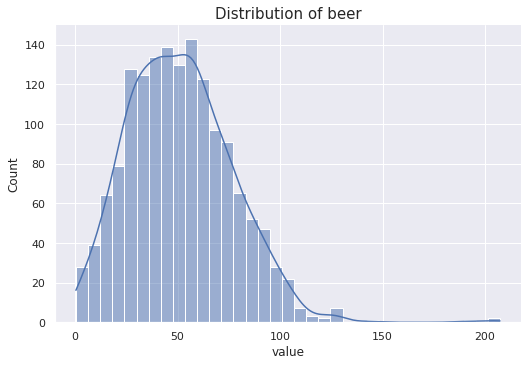

In [19]:
#@title Default title text
var = "beer" #@param ["beer","wine", "vodka", "champagne", "brandy"]

data= df.melt(value_vars=["beer","wine", "vodka", "champagne", "brandy"])

sns.displot(data=data.query("variable==@var"), x= "value", kind="hist", kde=True,aspect=1.5)
plt.title("Distribution of {}".format(var), fontdict={"size":15})
plt.show()

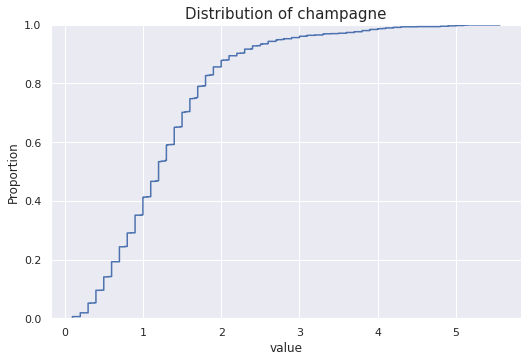

In [20]:
#@title Default title text
var = "champagne" #@param ["beer","wine", "vodka", "champagne", "brandy"]

data= df.melt(value_vars=["beer","wine", "vodka", "champagne", "brandy"])

sns.displot(data=data.query("variable==@var"), x= "value", kind="ecdf",aspect=1.5)


plt.title("Distribution of {}".format(var), fontdict={"size":15})
plt.show()

## Nan

In [21]:
df.isna().sum()

year          0
region        0
wine         63
beer         58
vodka        61
champagne    63
brandy       66
dtype: int64

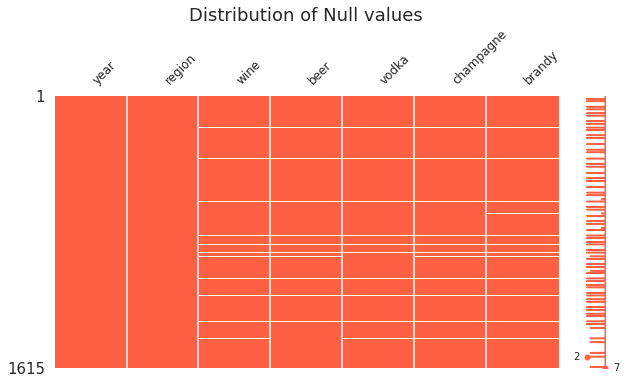

In [22]:
#Viz missing data 

import missingno as msno


# Visualize missingness
msno.matrix(df,
						figsize=(10,5), 
						fontsize=12, 
						color=(1, 0.38, 0.27))
plt.title("Distribution of Null values", fontdict={"size":18})
plt.show()

In [23]:
df["nan_count"] = df.isna().sum(axis=1)
print("There are {} rows with nan, out of those 56 are losing all the values.".format(len(df[df.nan_count>0]), len(df[df.nan_count==5])))


There are 66 rows with nan, out of those 56 are losing all the values.


In [24]:
regions = ["Chechen Republic", "Republic of Crimea","Sevastopol","Republic of Ingushetia"]
indeces = df[df.region.isin(regions)].index
df.drop(indeces, inplace=True)
df.isna().sum()

year         0
region       0
wine         0
beer         0
vodka        0
champagne    0
brandy       0
nan_count    0
dtype: int64

## Outliers

In [27]:
def tukeys_method(df, variable):
  #Takes two parameters: dataframe & variable of interest as string
  q1 = df[variable].quantile(0.25)
  q3 = df[variable].quantile(0.75)
  iqr = q3-q1
    
    
  #inner fence lower and upper end
  inner_fence_le = q1- (1.5*iqr) #q1- inner_fence
  inner_fence_ue = q3+ (1.5*iqr)
    
  #outer fence lower and upper end
  outer_fence_le = q1- (3*iqr)
  outer_fence_ue =  q3+ (3*iqr) # q3+outer_fence
    
  indeces_prob_outliers = []
  indecess_poss_outliers = []
  
  for index, x in enumerate(df[variable]):
    if x <= outer_fence_le or x >= outer_fence_ue:
      indeces_prob_outliers.append(index)
  for index, x in enumerate(df[variable]):
    if x <= inner_fence_le or x >= inner_fence_ue:
      indecess_poss_outliers.append(index)
		
  return indeces_prob_outliers, indecess_poss_outliers


probable_outliers_tm, possible_outliers_tm = tukeys_method(df,"wine")

print("probable outliers ",len(probable_outliers_tm), "possible outliers", len(possible_outliers_tm))

print("Percentage of possible outliers", round(len(possible_outliers_tm) / len(df),4),"%")
print("Percentage of probable outliers", round(len(probable_outliers_tm) / len(df),4),"%")


probable outliers  0 possible outliers 19
Percentage of possible outliers 0.0123 %
Percentage of probable outliers 0.0 %


# Continue evaluating Saint Petersburg

In [28]:
def matrix(corr, xticks = "none", yticks= "none",vmin= "none",vmax= "none", title="missed title"):
  """
  Plot a heat map of correlation matrix :
  corr is the result of df.corr()
  use before to sns.set(rc= {"figure.figsize": (6,6)}) to set size

  """

  if xticks == "none":
     xticks = corr.index
  if yticks == "none":
    yticks = corr.columns
  if vmin == "none":
    vmin= corr.min().min()
  
  if vmax == "none":
    vmax= corr.max().max()  
  mask = np.zeros_like(corr)
  mask[np.triu_indices_from(mask)] = True
  with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask,  square=True,
                   cbar=True, 
			  						annot=True, 
				  					fmt='.2f', 
					  				annot_kws={'size': 10},
                    yticklabels=yticks,
                    xticklabels=xticks, 
                     vmin=vmin, vmax=vmax)
  plt.yticks(rotation=0)
  plt.title(title, fontdict={"size":15})
  plt.show()


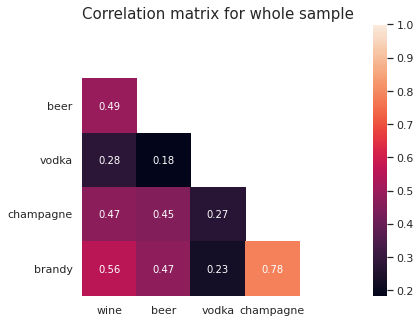

In [30]:

# correlation overall 
sns.set(rc= {"figure.figsize": (6,6)})
#sns.set(font_scale=1.25)
corr = df[cols].corr()
cols =["wine","beer", "vodka", "champagne", "brandy"]
yticks =[" ",'beer', 'vodka', 'champagne', 'brandy']
xticks = list(corr.index)
xticks.remove("brandy")

matrix(corr, title = "Correlation matrix for whole sample",yticks=yticks, xticks=xticks)

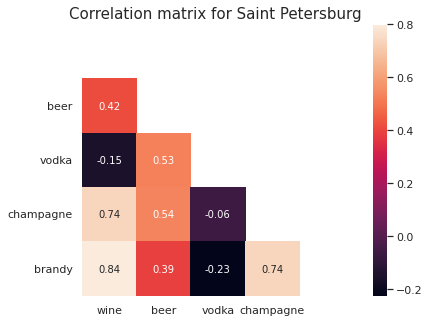

In [31]:
SaintPetersburg=df.query('region=="Saint Petersburg"')
SaintPetersburg = SaintPetersburg.iloc[:,[0,2,3,4,5,6]].set_index("year")
SaintPetersburg.head()
corr = SaintPetersburg.corr()

matrix(corr, xticks = xticks, yticks=yticks,vmax=.8, title ="Correlation matrix for Saint Petersburg ")

Author of function:  Zhiya Zuo in [Calculate Pearson Correlation Confidence Interval in Python](https://zhiyzuo.github.io/Pearson-Correlation-CI-in-Python/)

In [32]:
def pearsonr_ci(x,y,alpha=0.05):
  r, p = stats.pearsonr(x,y)
  r_z = np.arctanh(r)
  se = 1/np.sqrt(x.size-3)
  z = stats.norm.ppf(1-alpha/2)
  lo_z, hi_z = r_z-z*se, r_z+z*se
  lo, hi = np.tanh((lo_z, hi_z))
  return r, p, lo, hi


for col in ["beer"	,"vodka",	"champagne"	,"brandy"]:
  r, p, lo, hi = pearsonr_ci(SaintPetersburg.wine,SaintPetersburg[col])
  print("{} : Pearson r {} with p-value {} and 95% CI = [{}, {}]. Thereshold is {}".format(col,round(r,2), round(p,2), round(lo,2), round(hi,2),round(r-lo,3)   )) 


beer : Pearson r 0.42 with p-value 0.08 and 95% CI = [-0.05, 0.73]. Thereshold is 0.463
vodka : Pearson r -0.15 with p-value 0.54 and 95% CI = [-0.57, 0.33]. Thereshold is 0.416
champagne : Pearson r 0.74 with p-value 0.0 and 95% CI = [0.44, 0.9]. Thereshold is 0.307
brandy : Pearson r 0.84 with p-value 0.0 and 95% CI = [0.63, 0.94]. Thereshold is 0.214


Function in [Think Stast 2e](https://greenteapress.com/wp/think-stats-2e/) by Allen B. Downey. 

In [33]:
def SummarizeResults(results):
  """Prints the most important parts of linear regression results:

  results: RegressionResults object
  """
  f_pvalue = results.f_pvalue
  for name, param in results.params.items():
    pvalue = results.pvalues[name]
    print('%s   %0.3g   (%.3g)' % (name, param, pvalue))
  print("")
  for name, bse in results.bse.items():
    print('Std_err of','%s   %0.3g ' % (name, bse))

  try:
      print('R^2 %.4g  (%.3g)' % (results.rsquared,f_pvalue))
      ys = results.model.endog
      print('Std(ys) %.4g' % ys.std())
      print('Std(res) %.4g' % results.resid.std())
  except AttributeError:
      print('R^2 %.4g' % results.prsquared)

In [34]:
import statsmodels.formula.api as smf
data = SaintPetersburg.copy()
data["vodka2"]=data.vodka**2
model = smf.ols(formula= 'wine ~ beer + vodka +vodka2 + champagne  + brandy', data=data)
results = model.fit()
print("Results from OLS:")
SummarizeResults(results)


Results from OLS:
Intercept   7.8   (0.0894)
beer   0.00998   (0.448)
vodka   -1.46   (0.061)
vodka2   0.0605   (0.0596)
champagne   0.991   (0.261)
brandy   3.53   (0.0122)

Std_err of Intercept   4.25 
Std_err of beer   0.0128 
Std_err of vodka   0.712 
Std_err of vodka2   0.0293 
Std_err of champagne   0.842 
Std_err of brandy   1.22 
R^2 0.8048  (0.0003)
Std(ys) 2.109
Std(res) 0.9575


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


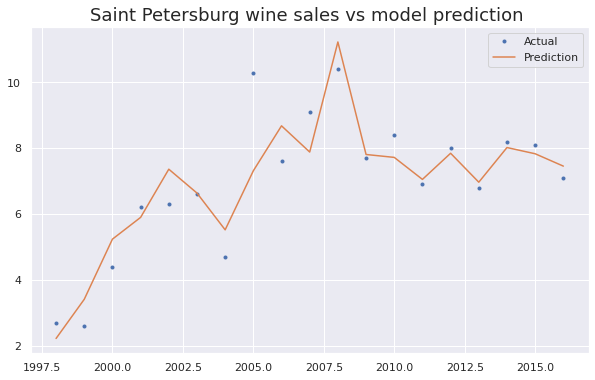

In [35]:
sns.set(rc= {"figure.figsize": (10, 6)})
y= results.predict()
plt.plot(data.index, data.wine, '.')
plt.plot(data.index, y, '-')
plt.legend(["Actual", "Prediction"])
plt.title("Saint Petersburg wine sales vs model prediction ", fontdict={"size":18})

plt.show()

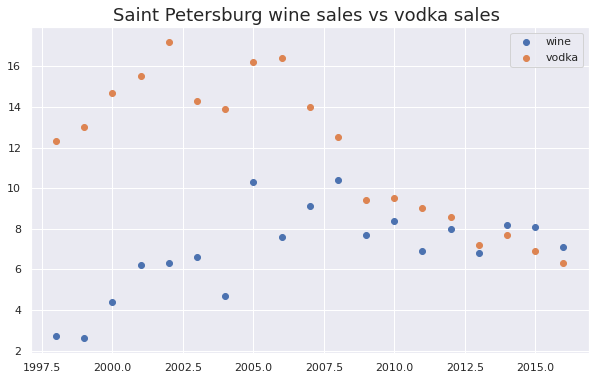

In [36]:
plt.scatter(data.index, data.wine, )
plt.scatter(data.index, data.vodka,)
plt.legend(["wine","vodka"])
plt.title("Saint Petersburg wine sales vs vodka sales ", fontdict={"size":18})
plt.show()

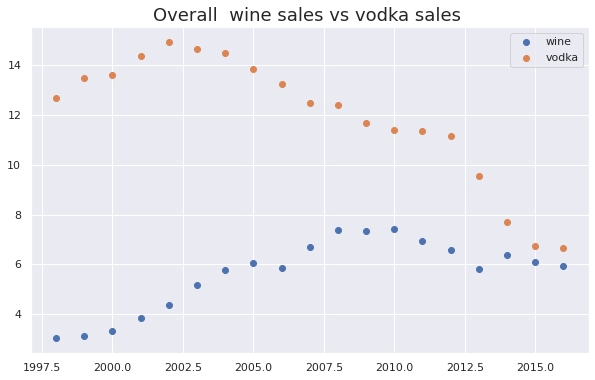

In [37]:
data_overall = df.groupby("year").mean()
plt.scatter(data_overall.index, data_overall.wine, )
plt.scatter(data_overall.index, data_overall.vodka,)
plt.legend(["wine","vodka"])
plt.title("Overall  wine sales vs vodka sales ", fontdict={"size":18})
plt.show()

In [38]:
data_2007_ff = SaintPetersburg.loc[2007:,:].copy()
data_2007_ff["vodka2"]=data_2007_ff.vodka**2
model = smf.ols(formula= 'wine ~ beer + vodka +vodka2 + champagne  + brandy', data=data_2007_ff)
results = model.fit()

print("Results from OLS of last 10 years :")
SummarizeResults(results)


Results from OLS of last 10 years :
Intercept   7.18   (0.47)
beer   0.0034   (0.842)
vodka   -0.934   (0.7)
vodka2   0.0484   (0.652)
champagne   0.798   (0.514)
brandy   2.04   (0.148)

Std_err of Intercept   8.99 
Std_err of beer   0.016 
Std_err of vodka   2.26 
Std_err of vodka2   0.0995 
Std_err of champagne   1.12 
Std_err of brandy   1.14 
R^2 0.8949  (0.0433)
Std(ys) 1.033
Std(res) 0.3531


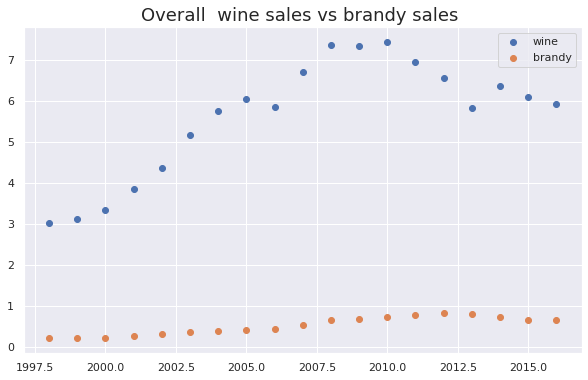

In [39]:
data_overall = df.groupby("year").mean()
plt.scatter(data_overall.index, data_overall.wine, )
plt.scatter(data_overall.index, data_overall.brandy,)
plt.legend(["wine","brandy"])
plt.title("Overall  wine sales vs brandy sales ", fontdict={"size":18})
plt.show()

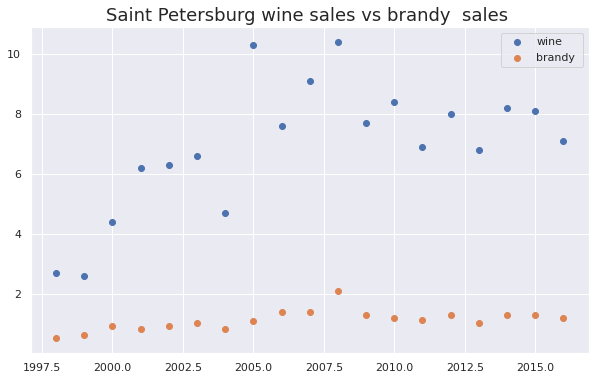

In [40]:
plt.scatter(data.index, data.wine, )
plt.scatter(data.index, data.brandy,)
plt.legend(["wine","brandy "])
plt.title("Saint Petersburg wine sales vs brandy  sales ", fontdict={"size":18})
plt.show()

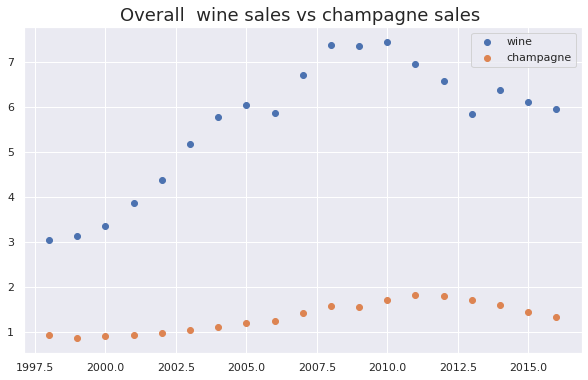

In [41]:
data_overall = df.groupby("year").mean()
plt.scatter(data_overall.index, data_overall.wine, )
plt.scatter(data_overall.index, data_overall.champagne,)
plt.legend(["wine","champagne"])
plt.title("Overall  wine sales vs champagne sales ", fontdict={"size":18})
plt.show()

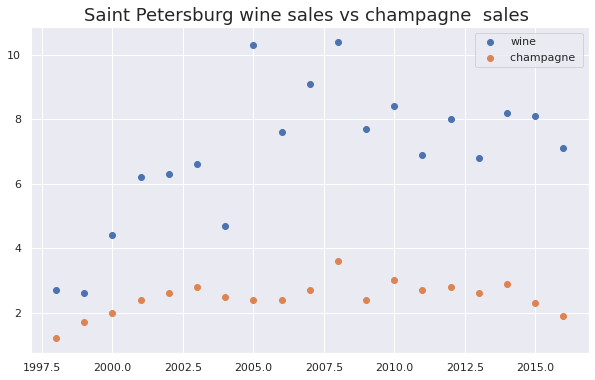

In [42]:
plt.scatter(data.index, data.wine, )
plt.scatter(data.index, data.champagne,)
plt.legend(["wine","champagne "])
plt.title("Saint Petersburg wine sales vs champagne  sales ", fontdict={"size":18})
plt.show()

# Conclusion 

* Brandy as the higher correlation with wine
* It seems that from 2007 forward vodka sales move close to wine
* Champgne as the second highest correlation
* Habbits change over the years so I' planned to also incorporate in decision making data for the last 10 years.

The change in vodka average sales is a prove of just that.

* Only Brandy and Champgne correlations to wine are statisitically significant with p-values \< 0.05 
* Brandy 95% CI =   [0.63, 0.94]  only consider regions with correlations that differ by less then 0.214
* Champgne 95% CI =   [0.44, 0.9]  only consider regions with correlations that differ by less then 0.307



# Evaluate correlation between wine and the other drinks

Mission: 
1. Calculate correlation between wine and others for Saint P.
2. Compare those correlations w/ correlations from another region
3. Repeat  for all other regions

In [43]:

corr = SaintPetersburg.corr()
corr_base = corr[["wine"]]

RepublicofAdygea=df.query('region=="Republic of Adygea"')
RepublicofAdygea = RepublicofAdygea.iloc[:,[0,2,3,4,5,6]].set_index("year")
corr_RepAd = RepublicofAdygea.corr()
corr_RepAd = corr_RepAd[["wine"]]
corr_RepAd.rename(columns={"wine":"RepAd"}, inplace=True)
pd.merge(corr_base,corr_RepAd, left_index=True, right_index=True )


,wine,RepAd
wine,1.000000,1.000000
beer,0.415810,0.459943
vodka,-0.150376,0.472896
champagne,0.743047,0.676635
brandy,0.842235,0.702030


Repeat for all so that each col is a region

In [44]:
regions=list(df.region.unique())
regions.remove("Saint Petersburg")

for region in regions:
  data = df.query('region==@region').iloc[:,[0,2,3,4,5,6]].set_index("year")
  corr = data.corr()[["wine"]].rename(columns={"wine":region})
  corr_base=pd.merge(corr_base,corr, left_index=True, right_index=True )

len(corr_base.columns) == df.region.nunique()
corr_base_diff= corr_base.copy()

for i in corr_base_diff.columns:
  corr_base_diff[i]= abs(corr_base_diff[i]-corr_base["wine"])
corr_base_diff_T = corr_base_diff.rename(columns={"wine":'Saint Petersburg'}).T
corr_base_diff_T["avg_diff"] = corr_base_diff_T.sum(axis=1) / 4
corr_base_diff_T["max_diff"] = corr_base_diff_T.max(axis=1)
corr_base_diff_T.sort_values(by="avg_diff").head(11).iloc[1:,:]

,wine,beer,vodka,champagne,brandy,avg_diff,max_diff
Tyumen Oblast,0.0,0.023632,0.104662,0.059410,0.006643,0.048587,0.104662
Kemerovo Oblast,0.0,0.139078,0.053518,0.015432,0.022329,0.057589,0.139078
Nenets Autonomous Okrug,0.0,0.062593,0.009419,0.098946,0.160668,0.082907,0.160668
Arkhangelsk Oblast,0.0,0.076923,0.106981,0.160962,0.035679,0.095136,0.160962
Yamalo-Nenets Autonomous Okrug,0.0,0.006697,0.086086,0.071620,0.228184,0.098147,0.228184
Khanty–Mansi Autonomous Okrug – Yugra,0.0,0.075174,0.044666,0.080522,0.214997,0.103840,0.214997
Smolensk Oblast,0.0,0.112811,0.003008,0.086634,0.317980,0.130108,0.317980
Novgorod Oblast,0.0,0.416186,0.000321,0.071954,0.049214,0.134419,0.416186
Lipetsk Oblast,0.0,0.221344,0.300202,0.014152,0.003613,0.134828,0.300202
Kaluga Oblast,0.0,0.160807,0.216620,0.061931,0.113085,0.138110,0.216620


# Output

`corr_base_diff_T` has the difference in correlations for all years including average and max difference per region 

# Correlation over last 10 years 

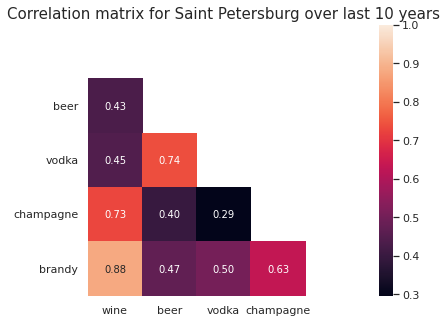

In [45]:
df_last_10 = df.query("year >2005")
SaintPetersburg_last_10=df_last_10.query('region=="Saint Petersburg"')
SaintPetersburg_last_10 = SaintPetersburg_last_10.iloc[:,[0,2,3,4,5,6]].set_index("year")
SaintPetersburg_last_10.head()
corr_last_10 = SaintPetersburg_last_10.corr()
corr_base_last_10 = corr_last_10[["wine"]]

#sns.set(font_scale=1.25)

matrix(corr_last_10, xticks=xticks, yticks=yticks, title = "Correlation matrix for Saint Petersburg over last 10 years")

In [46]:


for col in ["beer"	,"vodka",	"champagne"	,"brandy"]:
  r, p, lo, hi = pearsonr_ci(SaintPetersburg_last_10.wine,SaintPetersburg_last_10[col])
  print("{} : Pearson r {} with p-value {} and 95% CI = [{}, {}]. Thereshold is {}".format(col,round(r,2), round(p,2), round(lo,2), round(hi,2),round(r-lo,3)   )) 


beer : Pearson r 0.43 with p-value 0.18 and 95% CI = [-0.23, 0.82]. Thereshold is 0.658
vodka : Pearson r 0.45 with p-value 0.17 and 95% CI = [-0.21, 0.83]. Thereshold is 0.656
champagne : Pearson r 0.73 with p-value 0.01 and 95% CI = [0.23, 0.92]. Thereshold is 0.501
brandy : Pearson r 0.88 with p-value 0.0 and 95% CI = [0.59, 0.97]. Thereshold is 0.287


In [47]:



regions=list(df.region.unique())
regions.remove("Saint Petersburg")

for region in regions:
  data = df_last_10.query('region==@region').iloc[:,[0,2,3,4,5,6]].set_index("year")
  corr = data.corr()[["wine"]].rename(columns={"wine":region})
  corr_base_last_10=pd.merge(corr_base_last_10,corr, left_index=True, right_index=True )

assert(len(corr_base_last_10.columns) == df.region.nunique())
corr_base_diff_last_10= corr_base_last_10.copy()

for i in corr_base_diff_last_10.columns:
  corr_base_diff_last_10[i]= abs(corr_base_diff_last_10[i]-corr_base_last_10["wine"])
corr_base_diff_T_last_10 = corr_base_diff_last_10.rename(columns={"wine":'Saint Petersburg'}).T
corr_base_diff_T_last_10["avg_diff"] = corr_base_diff_T_last_10.sum(axis=1) / 4
corr_base_diff_T_last_10["max_diff"] = corr_base_diff_T_last_10.max(axis=1)

corr_last_10 = corr_base_diff_T_last_10

# Output


`corr_last_10` has the difference in correlations for the last 10 years

`vodka` becomes more correlated with wine over last 10 years but the result has a p-value > 0.05

# total consumption

In [48]:
avg_last_10 = df.query('year>2005').iloc[:,1:].groupby("region").mean()
avg_last_10_T_ = avg_last_10.T
avg_last_10_T = avg_last_10_T_.copy()
for i in avg_last_10_T.columns:
  avg_last_10_T[i]= abs(avg_last_10_T[i]-avg_last_10_T_["Saint Petersburg"])
avg_diff_last_10=avg_last_10_T.T
avg_sales_last_10= avg_last_10_T_.T.sort_values(by="wine", ascending=False)

avg_diff_last_10["avg_diff"] = avg_diff_last_10.sum(axis=1) / 4
avg_diff_last_10["max_diff"] = avg_diff_last_10.max(axis=1)


In [49]:
avg_diff_last_10

,wine,beer,vodka,champagne,brandy,nan_count,avg_diff,max_diff
region,,,,,,,,
Altai Krai,4.108182,29.885455,1.769091,1.442727,1.011818,0.0,9.554318,29.885455
Altai Republic,3.071818,34.979091,0.401818,1.686364,0.964545,0.0,10.275909,34.979091
Amur Oblast,1.608182,17.487273,1.955455,1.200909,0.808182,0.0,5.765000,17.487273
Arkhangelsk Oblast,2.102727,38.493636,5.084545,0.656364,0.335455,0.0,11.668182,38.493636
Astrakhan Oblast,3.198182,19.356364,1.888182,1.730909,0.824545,0.0,6.749545,19.356364
...,...,...,...,...,...,...,...,...
Vologda Oblast,1.494545,6.627273,4.120909,1.547273,0.744545,0.0,3.633636,6.627273
Voronezh Oblast,2.125455,14.692727,1.000000,0.982727,0.799091,0.0,4.900000,14.692727
Yamalo-Nenets Autonomous Okrug,2.197273,7.535455,3.305455,0.743636,0.004545,0.0,3.446591,7.535455


# Output
 
`avg_sales_last_10` -> average sales per region for last 10 years

`avg_diff_last_10` -> difference in sales quantity between regions, including average and max difference per region

# relative Sales

In [50]:
total_year=df.groupby("year").sum()
total_year["total"]= total_year.sum(axis=1)
total_year.reset_index(inplace=True)
total_year=pd.merge(df,total_year, right_on="year", left_on="year", how="left", suffixes=("","_total") )

total_year["rel_wine"] = total_year.wine*100 / total_year["wine_total"]
total_year["rel_brandy"] = total_year.brandy*100 / total_year["brandy_total"]
total_year["rel_beer"] = total_year.beer*100 / total_year["beer_total"]
total_year["rel_champagne"] = total_year.champagne*100 / total_year["champagne_total"]
total_year["rel_vodka"] = total_year.vodka*100 / total_year["vodka_total"]
total_year=total_year[["year","region","rel_wine","rel_beer","rel_vodka","rel_champagne","rel_brandy"]]
total_year

,year,region,rel_wine,rel_beer,rel_vodka,rel_champagne,rel_brandy
0,1998,Republic of Adygea,0.774246,0.532044,0.331319,0.405405,0.539374
1,1998,Altai Krai,1.344743,1.160822,1.101150,1.486486,0.539374
2,1998,Amur Oblast,0.855746,1.281741,1.685831,0.945946,2.157497
3,1998,Arkhangelsk Oblast,1.752241,0.640871,1.140129,0.540541,1.618123
4,1998,Astrakhan Oblast,1.181744,1.088271,0.925745,1.081081,1.078749
...,...,...,...,...,...,...,...
1534,2016,Chuvash Republic,1.040150,1.046408,1.431759,0.652377,0.742115
1535,2016,Chukotka Autonomous Okrug,0.811317,0.841085,2.156936,1.677540,2.040816
1536,2016,Sakha (Yakutia) Republic,0.894529,1.387789,1.524730,1.677540,0.927644
1537,2016,Yamalo-Nenets Autonomous Okrug,0.936135,1.875124,1.524730,1.584343,2.411874


In [51]:
total_year_diff= total_year.copy()
cols = ["rel_wine",	"rel_beer",	"rel_vodka"	,"rel_champagne",	"rel_brandy"]
for col in cols: 
  for year in df.year.unique():
    base =   total_year_diff.loc[ (total_year_diff.region=="Saint Petersburg")   & (total_year_diff.year==year),col].values 
    for region in df.region.unique():
      cond=(total_year_diff.region==region)   & (total_year_diff.year==year)
      total_year_diff.loc[ cond,col] =total_year_diff.loc[ cond,col] -  base

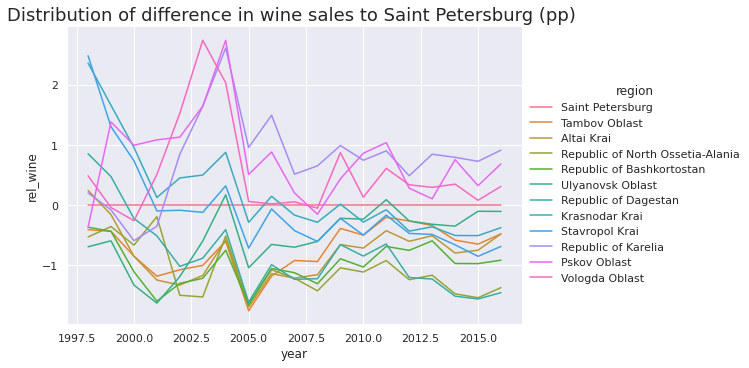

In [52]:

sns.set(rc= {"figure.figsize": (10, 6)})
regions_list=["Saint Petersburg",'Tambov Oblast',
 'Altai Krai',
 'Republic of North Ossetia-Alania',
 'Republic of Bashkortostan',
 'Ulyanovsk Oblast',
 'Republic of Dagestan','Krasnodar Krai',
 'Stavropol Krai',
 'Republic of Karelia',
 'Pskov Oblast',
 'Vologda Oblast']
sns.relplot(data=total_year_diff , x="year", y="rel_wine" , hue="region",hue_order=regions_list , kind="line", aspect=1.5)
plt.title("Distribution of difference in wine sales to Saint Petersburg (pp) ", fontdict={"size":18})

plt.show()

In [53]:
total_year_diff_last_10 = total_year_diff.query('year > 2005')


# Output


`total_year` sales per year per region relative to years total

`total_year_diff` :
1. For each year took the Saint P relative sale 
2. Subtract that from each region 
3. Did it for all years and drinks

`total_year_diff_last_10` : `total_year_diff` | 2006-2016

# How to think about correlation difference

All relative to base value : Saint Petersburg

1. `corr_base_diff_T` : correlation difference 
2. `corr_last_10` : correlation difference betweeen 2006-2016
3. `total_year_diff` : difference in relative sales 
4. `total_year_diff_last_10`: difference in relative sales 2006-2016
5. `avg_diff_last_10` : difference in average sales for the last 10 y

Use to visualize : `total_year_diff`

In [69]:
total_year_diff_region =  total_year_diff.groupby("region").mean()[["rel_wine"]]
total_year_diff_last_10_region = total_year_diff_last_10.groupby("region").mean()[["rel_wine"]]
compare_all = pd.merge(corr_base_diff_T,total_year_diff_region,left_index=True, right_index=True ,suffixes=("_corr","") )[["champagne",	"brandy",	"avg_diff"	,"max_diff"	,"rel_wine"]]
compare_last_10 = pd.merge(corr_last_10,total_year_diff_last_10_region,left_index=True, right_index=True ,suffixes=("_corr","") )[["champagne",	"brandy",	"avg_diff"	,"max_diff"	,"rel_wine"]]

compare_last_10["rel_wine"] = abs(compare_last_10["rel_wine"]) 

**Top 50 regions where wines sales moves closer to Saint Petersburg**

Most regions differ between arround 1 and -1.5 pp

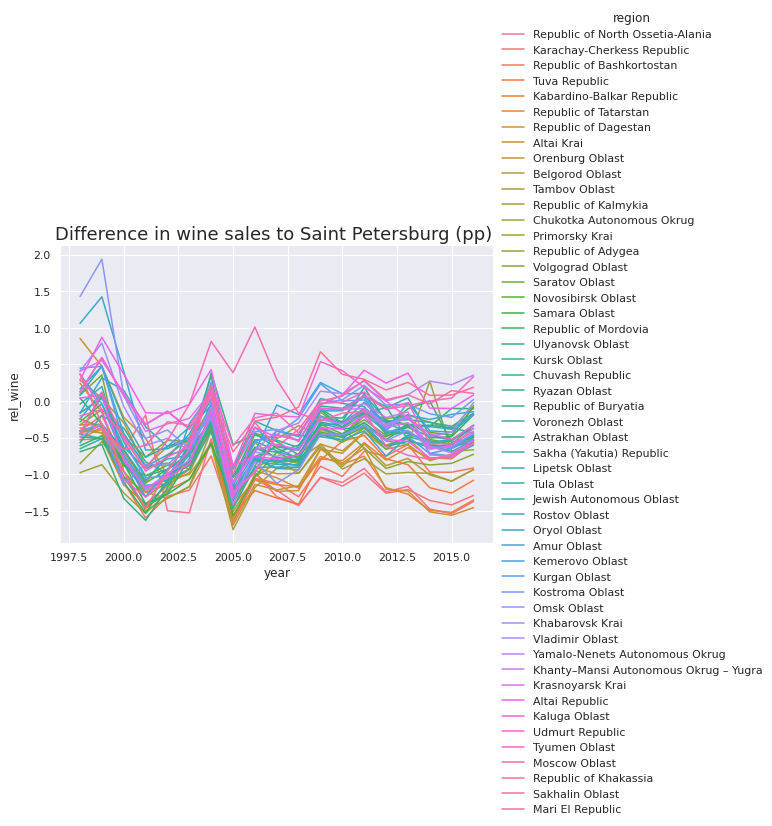

In [70]:
top_50_closest_to_wine_quantity= list(compare_all.sort_values(by="rel_wine", ascending=True).head(51).index)

sns.set(rc= {"figure.figsize": (10, 6)})

sns.relplot(data=total_year_diff , x="year", y="rel_wine" , hue="region",hue_order=top_50_closest_to_wine_quantity , kind="line", aspect=1.5)
plt.title("Difference in wine sales to Saint Petersburg (pp) ", fontdict={"size":18})

plt.show()

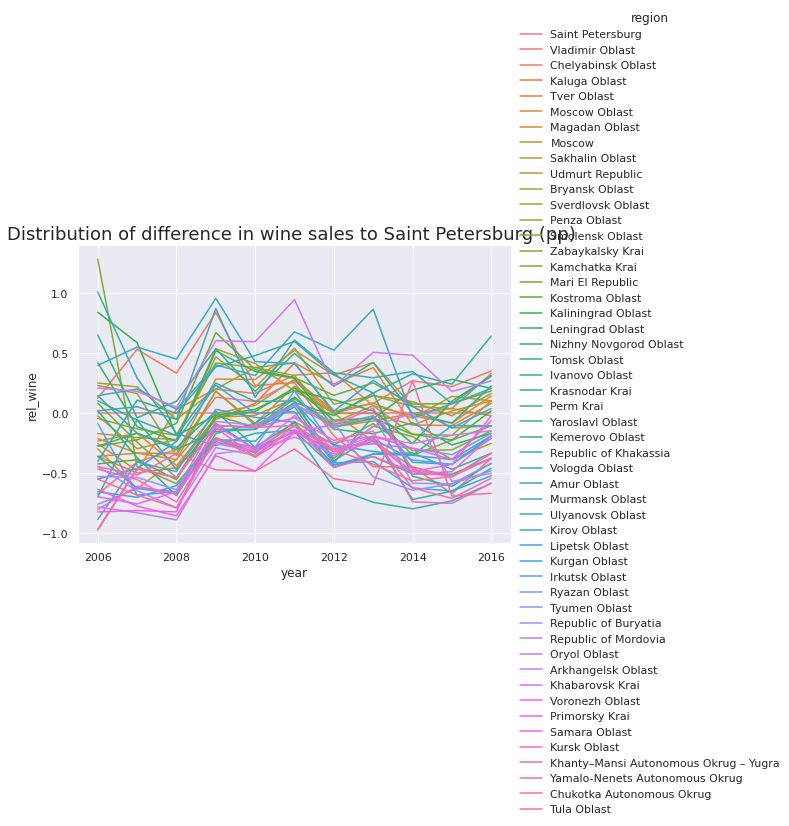

In [71]:
top_50_closest_to_wine_quantity_l_10= list(compare_last_10.sort_values(by="rel_wine", ascending=True).head(51).index)

sns.set(rc= {"figure.figsize": (10, 6)})

sns.relplot(data=total_year_diff_last_10 , x="year", y="rel_wine" , hue="region",hue_order=top_50_closest_to_wine_quantity_l_10 , kind="line", aspect=1.5)
plt.title("Distribution of difference in wine sales to Saint Petersburg (pp) ", fontdict={"size":18})

plt.show()

**20 Regions where champgne and Brandy correlation are within the CI's**  

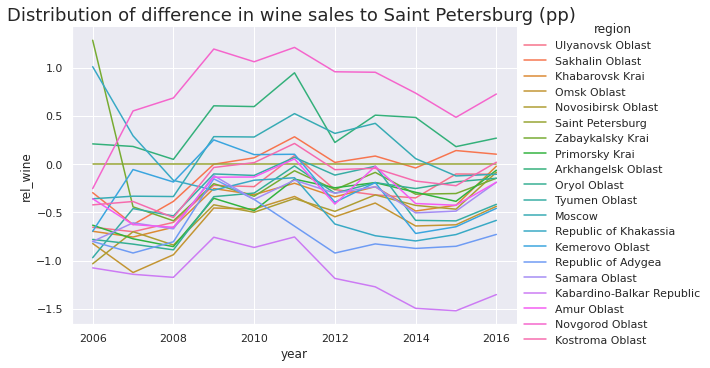

In [72]:
a = compare_all.query(' champagne <0.31 and  brandy<0.22 ').index
b= compare_last_10.query(' champagne <0.51 and  brandy<0.33 ').index
c= set(a) & set(b)

sns.set(rc= {"figure.figsize": (10, 6)})

sns.relplot(data=total_year_diff_last_10 , x="year", y="rel_wine" , hue="region",hue_order=c , kind="line", aspect=1.5)
plt.title("Distribution of difference in wine sales to Saint Petersburg (pp) ", fontdict={"size":18})

plt.show()

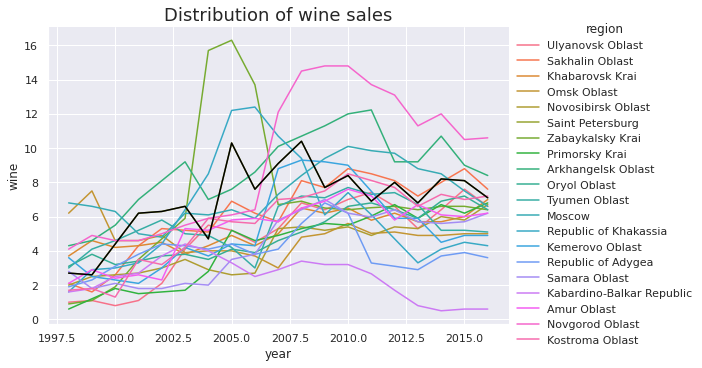

In [73]:
sns.set(rc= {"figure.figsize": (10, 6)})

sns.relplot(data=df , x="year", y="wine" , hue="region",hue_order=c , kind="line", aspect=1.5)
plt.title("Distribution of wine sales", fontdict={"size":18})

plt.plot(SaintPetersburg.index, SaintPetersburg.wine, "-", color="black")

plt.show()

In [74]:
compare_all.loc[c,:].sort_values(by="rel_wine").head(11)

,champagne,brandy,avg_diff,max_diff,rel_wine
Kabardino-Balkar Republic,0.121573,0.073149,0.365301,0.882444,-0.948079
Primorsky Krai,0.195394,0.129636,0.250870,0.539876,-0.644395
Republic of Adygea,0.066413,0.140205,0.218506,0.623271,-0.631472
Novosibirsk Oblast,0.074127,0.057534,0.150919,0.456616,-0.598348
Samara Oblast,0.176946,0.084249,0.189455,0.406637,-0.593982
Ulyanovsk Oblast,0.157651,0.080010,0.223760,0.438424,-0.544906
Oryol Oblast,0.072302,0.032747,0.271233,0.595621,-0.413149
Amur Oblast,0.038950,0.161916,0.257834,0.472488,-0.398651
Kemerovo Oblast,0.015432,0.022329,0.057589,0.139078,-0.398644
Kostroma Oblast,0.261545,0.021537,0.294880,0.475586,-0.342239


# All together

Finally only include wine distributions with similar mean and standard deviation

similar values are values within Saint Petersburg 95 % CI interval

Function from this course [DataCamp](https://app.datacamp.com/learn/courses/statistical-thinking-in-python-part-2)

In [75]:
def draw_bs_reps(data, func, size=1):
  """Draw bootstrap replicates.
	Size is the amount of bootstrap samples.
	Return a statistic from each a.k.a. bootstrap replicates"""
  # Initialize array of replicates: bs_replicates
  
  bs_replicates = np.empty(size)
  # Generate replicates
  for i in range(size):
    bs = np.random.choice(data, len(data))
    bs_replicates[i] = func(bs)
    
  return bs_replicates

In [76]:
pivot_wine = df.pivot_table(index="year", columns="region", values="wine")
x= pivot_wine["Saint Petersburg"]
bs_reps = draw_bs_reps(x, np.std, size=10000)
std_ci=np.percentile(bs_reps,[2.5,97.5])
bs_reps = draw_bs_reps(x, np.mean, size=10000)
mean_ci =  np.percentile(bs_reps,[2.5,97.5])
test= pivot_wine.T
test["mean"] = test.mean(axis=1)
test["std"] = test.std(axis=1)

a = test[(test["mean"]>mean_ci[0]) & (test["mean"] < mean_ci[1]) ].index
b= test[(test["std"]>std_ci[0]) & (test["std"] < std_ci[1]) ].index
d=(set(a)&set(b))
print("95% CI for mean :[{},{}]".format(round(mean_ci[0],2),round(mean_ci[1],2))) 
print("95% CI for std :[{},{}]".format(round(std_ci[0],2),round(std_ci[1],2))) 
print("There are {} regions that are valid contenders ".format(len(d)) )

95% CI for mean :[5.96,7.86]
95% CI for std :[1.33,2.63]
There are 14 regions that are valid contenders 


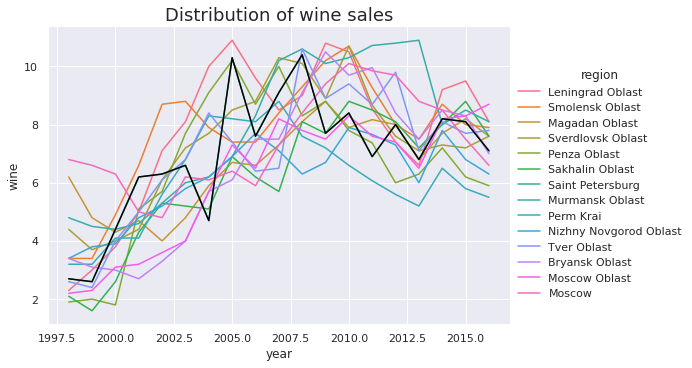

In [77]:
sns.set(rc= {"figure.figsize": (10, 6)})

sns.relplot(data=df , x="year", y="wine" , hue="region",hue_order=d , kind="line", aspect=1.5)
plt.title("Distribution of wine sales", fontdict={"size":18})

plt.plot(SaintPetersburg.index, SaintPetersburg.wine, "-", color="black")

plt.show()

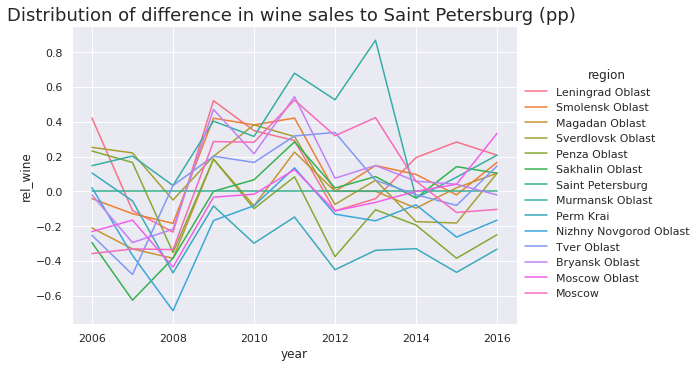

In [78]:
sns.set(rc= {"figure.figsize": (10, 6)})

sns.relplot(data=total_year_diff_last_10 , x="year", y="rel_wine" , hue="region",hue_order=d , kind="line", aspect=1.5)
plt.title("Distribution of difference in wine sales to Saint Petersburg (pp) ", fontdict={"size":18})

plt.show()

## Now lets find the ones with close correlations to Saint  Petersburg

In [79]:
test = compare_all.loc[d,:].sort_values(by="brandy")
test_l_10 = compare_last_10.loc[d,:].sort_values(by="brandy")
a = list(test.query(' champagne <0.38 and  brandy<0.23 ').index)
b= test_l_10.query(' champagne <0.51 and  brandy<0.33 ').index
c= set(a) & set(b)
a.remove('Saint Petersburg')
a_l_10 =list( test.query(' champagne <0.38 and  brandy<0.23 ').index)
b_l_10= test_l_10.query(' champagne <0.51 and  brandy<0.33 ').index
c_l_10= set(a) & set(b)
a_l_10.remove('Saint Petersburg')

(set(a) & set(a_l_10)) == set(a)

True

# Top 10 regions with closest correlations between wine ~ champgne and wine ~ brandy ranked by average percentage of wine sales in year 

In [85]:
Final = list(compare_all.loc[a,:].sort_values(by="rel_wine", ascending=False).index)
Final

['Murmansk Oblast',
 'Moscow',
 'Leningrad Oblast',
 'Sverdlovsk Oblast',
 'Tver Oblast',
 'Magadan Oblast',
 'Bryansk Oblast',
 'Nizhny Novgorod Oblast',
 'Sakhalin Oblast',
 'Moscow Oblast']

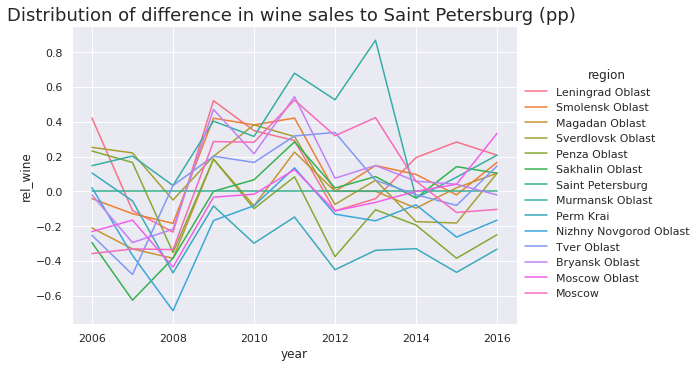

In [86]:
sns.set(rc= {"figure.figsize": (10, 6)})

sns.relplot(data=total_year_diff_last_10 , x="year", y="rel_wine" , hue="region",hue_order=d , kind="line", aspect=1.5)
plt.title("Distribution of difference in wine sales to Saint Petersburg (pp) ", fontdict={"size":18})

plt.show()

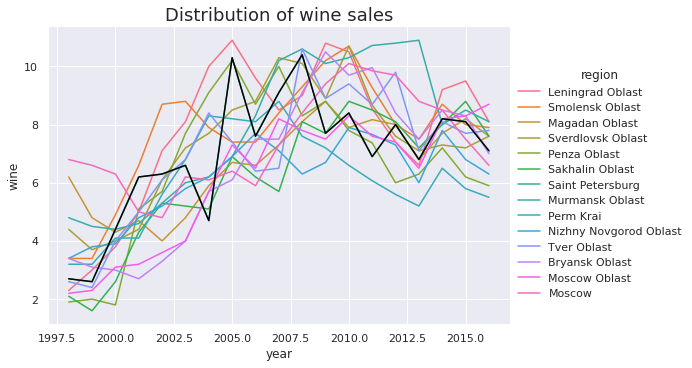

In [87]:
sns.set(rc= {"figure.figsize": (10, 6)})

sns.relplot(data=df , x="year", y="wine" , hue="region",hue_order=d , kind="line", aspect=1.5)
plt.title("Distribution of wine sales", fontdict={"size":18})

plt.plot(SaintPetersburg.index, SaintPetersburg.wine, "-", color="black")

plt.show()